# Dependencias

In [1]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import dataframe_image as dfi

# Objetivo

Establecer un criterio estadístico robusto sobre los operadores que podrían participar en el Comité de Pequeños Operadores.

Elaborado por la Dirección General Adjunta de Prospectiva y Análisis de Impacto Económico del IFT.

# Descripción de los datos

Se parte de la información proporcionada por la Dirección General Adjunta de Estadística de la CGPE.

<strong>ingresos_granular.csv</strong> -> Incluye los ingresos trimestrales reportados por los concesionarios en 2020. 

Los ingresos se dividen en el conjunto de datos por los siguientes conceptos: 
    
-  ING_VEN_REN - Ingresos de ventas por renta
-  ING_INSTALACION_MANTENIMIENTO - Ingresos por servicios de instalación y mantenimiento
-  ING_SERV_MINOR_TELECOM - Ingresos provenientes de los servicios minoristas de telecomunicaciones
-  ING_SERV_MAY_TELECOM - Ingresos provenientes de los servicios mayoristas de telecomunicaciones
-  ING_SERV_OTT - Ingresos totales provenientes de los servicios OTT (esta columna no presenta valor alguno para algún registro, se descarta)
-  ING_SERV_MINOR_OTT - Ingresos provenientes de los servicios minoristas OTT
-  ING_SERV_MAY_OTT - Ingresos provenientes de los servicios mayoristas OTT
-  ING_OTROS_SERV - Ingresos provenientes de otros servicios
-  ING_PUBLI - Ingresos provenientes de la publicidad
-  ING_OTROS - Otros ingresos
-  ING_OTROS_NO_SERV - Ingresos provenientes de otros servicios que no son telecomunicaciones.


# Extracción

In [3]:
ingresos = pd.read_csv("ingresos_granular.csv", encoding = "Latin1")
grupos_económicos = pd.read_csv("grupos.csv", encoding = "Latin1")

In [4]:
ingresos.dtypes

FOLIO                              int64
ANIO                               int64
TRIM                               int64
CONCESIONARIO                     object
ING_VEN_REN                      float64
ING_INSTALACION_MANTENIMIENTO    float64
ING_SERV_MINOR_TELECOM           float64
ING_SERV_MAY_TELECOM             float64
ING_SERV_OTT                     float64
ING_SERV_MINOR_OTT               float64
ING_SERV_MAY_OTT                 float64
ING_OTROS_SERV                   float64
ING_PUBLI                        float64
ING_OTROS                        float64
ING_OTROS_NO_SERV                float64
dtype: object

In [5]:
grupos_económicos.dtypes

GRUPO            object
EMPRESA          object
CONCESIONARIO    object
dtype: object

In [6]:
ingresos.head()

,FOLIO,ANIO,TRIM,CONCESIONARIO,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV
0,100389,2020,1,"LOGICA INDUSTRIAL, S.A. DE C.V.",NaN,NaN,9236180.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100389,2020,2,"LOGICA INDUSTRIAL, S.A. DE C.V.",NaN,NaN,5853726.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100389,2020,3,"LOGICA INDUSTRIAL, S.A. DE C.V.",NaN,NaN,5153380.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100389,2020,4,"LOGICA INDUSTRIAL, S.A. DE C.V.",0.00,0.00,4142108.56,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.00
4,100405,2020,1,"ULTRAVISION, S.A. DE C.V.",708749.16,443468.08,3915451.66,0.0,NaN,0.0,0.0,0.0,0.0,NaN,169777.36


In [7]:
grupos_económicos

,GRUPO,EMPRESA,CONCESIONARIO
0,ADDINTELI,ADDINTELI,AGREGADORA DE INTELIGENCIA EN NEGOCIOS TECNOLO...
1,AIRBUS,AIRBUS,"AIRBUS SLC, S.A. DE C.V."
2,AIRECABLE,AIRECABLE,"AIRE CABLE, S.A. DE C.V."
3,ALTAN,ALTAN,"ALTAN REDES, S.A.P.I. DE C.V."
4,ALTCEL,ALTCEL,"ALTCEL, S.A.P.I. DE C.V."
...,...,...,...
77,WEEX,WEEX,"COMRELOADED, S.A.P.I. DE C.V."
78,WEEX,WEEX,"TRUU INNOVATION, S.A.P.I. DE C.V."
79,WIMOTELECOM,WIMOTELECOM,"WIMOTELECOM, S.A. DE C.V."
80,MAXCOM,YOBI TELECOM,"CELMAX MOVIL, S.A. DE C.V."


# Transformación

### Paso 1:
Se obtienen los ingresos totales, sumando todas las columnas para cada registro del conjunto de datos "ingresos" (264 registros y 10 columnas numéricas, se descarta la columna de <i>ING_SERV_OTT</i>). 

El resultado es el ingreso trimestral total de ese concesionario (Columna "Ingresos_Nominales_totales").

### Paso 2:

Se acumulan los ingresos de cada trimestre para obtener los ingresos nominales acumulados por cada uno de los 67 concesionarios disponibles.

El resultado es el ingreso anual total de ese concesionario (Columna "Ingresos_Nominales_Totales")

Existen casos especiales que no representan una modificación en el criterio definido. En el caso de <b>YONDER MEDIA MOBILE MEXICO, S. DE R.L. DE C.V.</b> y <b>GRUPO W COM, S.A. DE C.V.</b> únicamente se cuenta con dos trimestres de información (3T y 4T), todos los demás concesionarios reportan información en los cuatro trimestres del año.

No obstante lo anterior, los ingresos son relativamente pequeños si consideramos el ingreso promedio de todos los concesioanrios en 3T y 4T, razón por la cual se continuarían considerando pequeños a pesar de no tener un acumulado anual de cuatro trimestres.

<table>
  <tr>
    <th>Periodo</th>
    <th>Promedio considerando todos los <br> concesionarios y autorizados</th>
    <th>YONDER</th>
    <th>GRUPO W COM S.A. de C.V.</th>
    <th>VALOR AGREGADO DIGITAL, S.A. DE C.V.</th>
  </tr>
  <tr>
    <td>T3</td>
    <td> &#36;62,121,713,038.63</td>
    <td> &#36;4,005,571.82</td>
    <td>&#36;32,120,930.35</td>
    <td>&#36;1,448,586.00</td>   
  </tr>
  <tr>
    <td>T4</td>
    <td>&#36;2,195,640,307.85</td>
    <td>&#36;360,937.47</td>
    <td> &#36;76,126,589.85</td>
    <td>&#36; $2,416,212.00</td>
  </tr>
</table>

Adicionalmente se encontró un operadore que no reportó ingresos durante el 2020, pero que se reporta en las estadísticas como missing: <strong>MARDUK INNOVACIONES MOVILES, S.A. DE C.V.</strong>. De igual forma, <strong>VALOR AGREGADO DIGITAL, S.A. DE C.V.</strong> donde se reportan ingresos positivos en el 3T y 4T y como missings los trimestres anteriores.

### Paso 3:

Se agrupan los registros en función del diccionario de "grupos económicos" proporcionado por la Dirección General Adjunta de Estadística del IFT.


In [8]:
ingresos.columns

Index(['FOLIO', 'ANIO', 'TRIM', 'CONCESIONARIO', 'ING_VEN_REN',
       'ING_INSTALACION_MANTENIMIENTO', 'ING_SERV_MINOR_TELECOM',
       'ING_SERV_MAY_TELECOM', 'ING_SERV_OTT', 'ING_SERV_MINOR_OTT',
       'ING_SERV_MAY_OTT', 'ING_OTROS_SERV', 'ING_PUBLI', 'ING_OTROS',
       'ING_OTROS_NO_SERV'],
      dtype='object')

In [9]:
# Paso 1 (ingresos totales):
pd.options.display.float_format = '{:.2f}'.format
lista_columnas = ['ING_VEN_REN',
       'ING_INSTALACION_MANTENIMIENTO', 'ING_SERV_MINOR_TELECOM',
       'ING_SERV_MAY_TELECOM', 'ING_SERV_MINOR_OTT',
       'ING_SERV_MAY_OTT', 'ING_OTROS_SERV', 'ING_PUBLI', 'ING_OTROS',
       'ING_OTROS_NO_SERV']
ingresos['Ingresos_Nominales_Totales'] = ingresos[lista_columnas].sum(axis=1)


In [10]:
# ¿Cómo luce el conjunto de datos?
ingresos.tail()

,FOLIO,ANIO,TRIM,CONCESIONARIO,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales
259,517806,2020,2,"FTTH DE MÉXICO, S.A. DE C.V.",5095915.82,3870358.48,518277546.10,0.00,0.00,0.00,NaN,10001251.25,0.00,NaN,-33753898.49,503491173.16
260,517806,2020,3,"FTTH DE MÉXICO, S.A. DE C.V.",4529689.89,3634384.90,510294351.70,0.00,NaN,0.00,0.00,9402113.81,0.00,NaN,-31550112.12,496310428.18
261,517806,2020,4,"FTTH DE MÉXICO, S.A. DE C.V.",2842532.96,3302037.40,314997837.20,NaN,0.00,0.00,0.00,5720140.08,0.00,NaN,-17906824.50,308955723.14
262,518394,2020,3,"YONDER MEDIA MOBILE MEXICO, S. DE R.L. DE C.V.",NaN,NaN,5571.82,NaN,NaN,NaN,NaN,NaN,4000000.00,NaN,NaN,4005571.82
263,518394,2020,4,"YONDER MEDIA MOBILE MEXICO, S. DE R.L. DE C.V.",NaN,NaN,43178.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317758.62,360937.47


In [11]:
# Confirmando al número de concesionarios:

concesionarios = ingresos['CONCESIONARIO'].unique()
len(concesionarios)

67

In [12]:
# Obteniendo el ingreso promedio de todos los operadores en el segundo y tercer trimestre

ingresos.groupby(['TRIM']).mean()

,FOLIO,ANIO,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales
TRIM,,,,,,,,,,,,,,
1,209806.92,2020.00,597154295.67,66488115.43,1552731962.38,199966350.16,0.00,1008352.63,0.00,160931799.96,49333981.08,121247601.70,301685729.21,2081654392.37
2,209806.92,2020.00,415666926.71,61388112.73,1457747313.49,204152423.01,0.00,919665.73,0.00,157280738.79,48427362.07,23602281.91,436378368.72,1968121803.46
3,212779.90,2020.00,582306266.34,44037827.64,1373246806.36,142105956.80,0.00,546083.71,1599806.59,126328884.68,33484107.23,NaN,326682586.63,2121713038.63
4,212779.90,2020.00,579138192.25,45587897.36,1424900297.88,153618656.29,0.00,504585.53,1913195.43,130804484.80,49292486.77,0.00,316479581.11,2195640307.85


In [13]:
# Considerando que los operadores con información disponible para el tercer y cuarto trimestre son relativamente pequeños con respecto al promedio
# Podemos proceder a calcular los Ingresos Acumulados Totales 2020 de cada uno de los 67 concesionarios identificados.

ingresos_concesionario = ingresos.groupby(['CONCESIONARIO']).sum()
ingresos_concesionario.sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,FOLIO,ANIO,TRIM,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales
CONCESIONARIO,,,,,,,,,,,,,,,
"RADIOMOVIL DIPSA, S.A. DE C.V.",402500,8080,10,63901329748.00,990868946.70,130759212668.00,541937138.20,0.00,0.00,0.00,10122392839.00,1735487483.30,0.00,0.00,208051228823.20
"TELEFONOS DE MEXICO, S.A.B. DE C.V.",411968,8080,10,727036218.64,1272955978.90,70430023087.00,8310738962.00,0.00,0.00,0.00,9827377659.00,0.00,0.00,29389654014.00,119957785919.54
"AT&T COMUNICACIONES DIGITALES, S. DE R.L. DE C.V.",429304,8080,10,20197139481.00,0.00,30605725836.00,2599633378.70,0.00,62692201.94,0.00,590244789.00,0.00,0.00,904152640.40,54959588327.04
"CORPORACION DE RADIO Y TELEVISION DEL NORTE DE MEXICO, S. DE R.L. DE C.V.",403080,8080,10,0.00,0.00,8199279870.00,0.00,0.00,0.00,0.00,207415869.77,1112662158.80,0.00,22228359479.00,31747717377.57
"PEGASO PCS, S.A. DE C.V.",405384,8080,10,6498022779.00,0.00,13130411321.00,5541700383.00,0.00,0.00,113702482.40,102275025.76,646046652.10,144849883.61,0.00,26177008526.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"EDILAR, S.A. DE C.V.",2068596,8080,10,0.00,0.00,514113.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,514113.38
"GEOS TELECOM, S.A.P.I. DE C.V.",2067596,8080,10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,274650.68,274650.68
"KING DAVID MOBILE, S.A.P.I. DE C.V.",2067968,8080,10,21885.61,0.00,195954.72,0.00,0.00,0.00,0.00,20179.43,0.00,0.00,0.00,238019.76


In [14]:
ingresos_concesionario.reset_index(inplace=True)

In [15]:
ingresos_concesionario.sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,CONCESIONARIO,FOLIO,ANIO,TRIM,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales
50,"RADIOMOVIL DIPSA, S.A. DE C.V.",402500,8080,10,63901329748.00,990868946.70,130759212668.00,541937138.20,0.00,0.00,0.00,10122392839.00,1735487483.30,0.00,0.00,208051228823.20
54,"TELEFONOS DE MEXICO, S.A.B. DE C.V.",411968,8080,10,727036218.64,1272955978.90,70430023087.00,8310738962.00,0.00,0.00,0.00,9827377659.00,0.00,0.00,29389654014.00,119957785919.54
5,"AT&T COMUNICACIONES DIGITALES, S. DE R.L. DE C.V.",429304,8080,10,20197139481.00,0.00,30605725836.00,2599633378.70,0.00,62692201.94,0.00,590244789.00,0.00,0.00,904152640.40,54959588327.04
18,CORPORACION DE RADIO Y TELEVISION DEL NORTE DE...,403080,8080,10,0.00,0.00,8199279870.00,0.00,0.00,0.00,0.00,207415869.77,1112662158.80,0.00,22228359479.00,31747717377.57
48,"PEGASO PCS, S.A. DE C.V.",405384,8080,10,6498022779.00,0.00,13130411321.00,5541700383.00,0.00,0.00,113702482.40,102275025.76,646046652.10,144849883.61,0.00,26177008526.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,"EDILAR, S.A. DE C.V.",2068596,8080,10,0.00,0.00,514113.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,514113.38
24,"GEOS TELECOM, S.A.P.I. DE C.V.",2067596,8080,10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,274650.68,274650.68
34,"KING DAVID MOBILE, S.A.P.I. DE C.V.",2067968,8080,10,21885.61,0.00,195954.72,0.00,0.00,0.00,0.00,20179.43,0.00,0.00,0.00,238019.76
21,"ESMERO SOLUTIONS MÉXICO, S.A. DE C.V.",2066832,8080,10,23395.00,0.00,138347.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,161742.00


In [16]:
# Con el objeto de obtener los ingresos por grupo económico y garantizar que sólo los concesionario con
# un ingreso relativamente bajo sean los que participen en el Comité de Pequeños Operadores
# Se agregan por grupo económico.

grupos_económicos.set_index(['CONCESIONARIO'], inplace=True)
ingresos_concesionario.set_index(['CONCESIONARIO'], inplace=True)

ingresos_por_grupo = ingresos_concesionario.join(grupos_económicos).reset_index()

In [17]:
ingresos_por_grupo

,CONCESIONARIO,FOLIO,ANIO,TRIM,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales,GRUPO,EMPRESA
0,"ACE TELECOMUNICACIONES, S.A. DE C.V.",406208,8080,10,0.00,0.00,2242314.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2720113.00,4962427.00,MARCALESS,MARCALESS
1,"AIRBUS SLC, S.A. DE C.V.",2062436,8080,10,7938891.02,6634322.88,6682313.06,0.00,0.00,2450517.81,0.00,335010457.79,0.00,0.00,481835789.70,840552292.26,AIRBUS,AIRBUS
2,"AIRE CABLE, S.A. DE C.V.",401968,8080,10,0.00,0.00,15501238.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15501238.05,AIRECABLE,AIRECABLE
3,"ALTAN REDES, S.A.P.I. DE C.V.",2041240,8080,10,21612227.12,0.00,0.00,989748652.70,0.00,0.00,0.00,102890802.08,0.00,0.00,155018378.81,1269270060.71,ALTAN,ALTAN
4,"ALTCEL, S.A.P.I. DE C.V.",2059400,8080,10,0.00,799652.27,2154210.44,0.00,0.00,0.00,0.00,320082.55,0.00,0.00,404235.26,3678180.52,ALTCEL,ALTCEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"ULTRAVISION, S.A. DE C.V.",401620,8080,10,4103649.49,4362970.55,21536938.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25434601.86,55438160.14,ULTRAVISION,ULTRAVISION
63,"VALOR AGREGADO DIGITAL, S.A. DE C.V.",2007628,8080,10,0.00,106736.00,3649971.00,0.00,0.00,0.00,0.00,108091.00,0.00,0.00,0.00,3864798.00,VADSA,VADSA
64,"VIASAT TECNOLOGIA, S.A. DE C.V.",2041312,8080,10,0.00,0.00,5190298.50,52901156.51,0.00,0.00,0.00,2487460.91,0.00,0.00,0.00,60578915.92,VIASAT,VIASAT
65,"VIRGIN MOBILE MEXICO, S. DE R.L. DE C.V.",427320,8080,10,-647056.63,0.00,189213064.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,188566007.94,VIRGIN MOBILE,VIRGIN MOBILE


In [18]:
#Probando la agrupación

ingresos_por_grupo[ingresos_por_grupo['CONCESIONARIO']=='GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD, S.A.P.I. DE C.V.']

,CONCESIONARIO,FOLIO,ANIO,TRIM,ING_VEN_REN,ING_INSTALACION_MANTENIMIENTO,ING_SERV_MINOR_TELECOM,ING_SERV_MAY_TELECOM,ING_SERV_OTT,ING_SERV_MINOR_OTT,ING_SERV_MAY_OTT,ING_OTROS_SERV,ING_PUBLI,ING_OTROS,ING_OTROS_NO_SERV,Ingresos_Nominales_Totales,GRUPO,EMPRESA
25,"GRUPO DE TELECOMUNICACIONES DE ALTA CAPACIDAD,...",402384,8080,10,491791467.37,328277720.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1320399.77,821389587.29,GRUPO TELEVISA,GTAC REDES DE FIBRA OPTICA


In [19]:
# Simplificamos el conjunto de datos
ingresos_por_grupo.columns

Index(['CONCESIONARIO', 'FOLIO', 'ANIO', 'TRIM', 'ING_VEN_REN',
       'ING_INSTALACION_MANTENIMIENTO', 'ING_SERV_MINOR_TELECOM',
       'ING_SERV_MAY_TELECOM', 'ING_SERV_OTT', 'ING_SERV_MINOR_OTT',
       'ING_SERV_MAY_OTT', 'ING_OTROS_SERV', 'ING_PUBLI', 'ING_OTROS',
       'ING_OTROS_NO_SERV', 'Ingresos_Nominales_Totales', 'GRUPO', 'EMPRESA'],
      dtype='object')

In [20]:
# Obtenemos el conjunto de datos simplificado

ingresos_por_grupo = ingresos_por_grupo[['CONCESIONARIO', 'GRUPO', 'Ingresos_Nominales_Totales']]
ingresos_por_grupo.sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,CONCESIONARIO,GRUPO,Ingresos_Nominales_Totales
50,"RADIOMOVIL DIPSA, S.A. DE C.V.",AMÉRICA MÓVIL,208051228823.20
54,"TELEFONOS DE MEXICO, S.A.B. DE C.V.",AMÉRICA MÓVIL,119957785919.54
5,"AT&T COMUNICACIONES DIGITALES, S. DE R.L. DE C.V.",AT&T,54959588327.04
18,CORPORACION DE RADIO Y TELEVISION DEL NORTE DE...,GRUPO TELEVISA,31747717377.57
48,"PEGASO PCS, S.A. DE C.V.",TELEFÓNICA,26177008526.87
...,...,...,...
19,"EDILAR, S.A. DE C.V.",EDILAR,514113.38
24,"GEOS TELECOM, S.A.P.I. DE C.V.",NaN,274650.68
34,"KING DAVID MOBILE, S.A.P.I. DE C.V.",MIIO,238019.76
21,"ESMERO SOLUTIONS MÉXICO, S.A. DE C.V.",ESMERO SOLUTIONS,161742.00


In [21]:
pd.isna(ingresos_por_grupo['GRUPO']).sum()

3

In [22]:
# Aquellos no identificados en el diccionario de grupos económicos original
ingresos_por_grupo[ingresos_por_grupo['GRUPO'].isnull()]

,CONCESIONARIO,GRUPO,Ingresos_Nominales_Totales
6,"AXESAT MEXICO, S.A. DE C.V.",NaN,241461303.79
24,"GEOS TELECOM, S.A.P.I. DE C.V.",NaN,274650.68
49,"QUETZSAT, S. DE R.L. DE C.V.",NaN,530661872.00


In [23]:
# Confirmación de los grupos económicos en información comercial disponible
# Se confirma que no pertenecen a un grupo económico y se incluyen como tal en el conjunto de datos
ingresos_por_grupo.at[6, 'GRUPO'] = 'AXESAT MEXICO, S.A. DE C.V.'

In [24]:
ingresos_por_grupo.at[24, 'GRUPO'] = 'GEOS TELECOM, S.A.P.I. DE C.V.'
ingresos_por_grupo.at[49, 'GRUPO'] = 'QUETZSAT, S. DE R.L. DE C.V.'

In [25]:
ingresos_por_grupo.to_csv("ingresos_antes_grupos.csv")

In [26]:
ingresos_por_grupo = ingresos_por_grupo.groupby(['GRUPO']).sum()
ingresos_por_grupo

,Ingresos_Nominales_Totales
GRUPO,
AIRBUS,840552292.26
AIRECABLE,15501238.05
ALTAN,1269270060.71
ALTCEL,3678180.52
AMÉRICA MÓVIL,328009014742.74
AT&T,54959588327.04
"AXESAT MEXICO, S.A. DE C.V.",241461303.79
AXTEL,12355980747.07
BBG COMUNICACION,92735816.56


In [27]:
ingresos_por_grupo.reset_index().sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,GRUPO,Ingresos_Nominales_Totales
4,AMÉRICA MÓVIL,328009014742.74
22,GRUPO TELEVISA,73507375373.52
5,AT&T,54959588327.04
43,TELEFÓNICA,26177008526.87
32,MEGACABLE-MCM,23882952907.24
45,TOTALPLAY,16755280386.00
7,AXTEL,12355980747.07
14,DISH-MVS,6085327657.00
42,STARGROUP,1741935688.53
2,ALTAN,1269270060.71


Del análisis de la información se observa que Helppy no presenta ingresos en el conjunto de datos original.
No obstante, se trata de un operador que se encuentra en fase Beta, de acuerdo con los datos de la Dirección General de Prospectiva y Análisis de Impacto Económico.

# Análisis Exploratorio de Datos

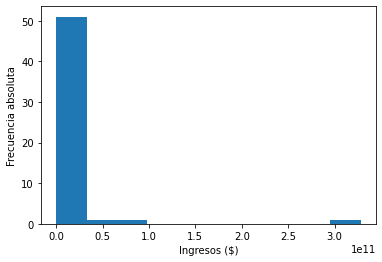

NormaltestResult(statistic=array([111.35915853]), pvalue=array([6.586671e-25]))


In [28]:
plt.hist(ingresos_por_grupo['Ingresos_Nominales_Totales'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(ingresos_por_grupo)) # no pasa la prueba de normalidad (sesgo)

In [29]:
# Análisis de varianza
var_numpy = np.var(ingresos_por_grupo['Ingresos_Nominales_Totales'], ddof = 0)
print(f"La varianza de los ingresos totales en 2020 es de {var_numpy}")

sd_numpy = np.std(ingresos_por_grupo['Ingresos_Nominales_Totales'],ddof = 0)
print(f"La desviación estándar de los ingresos totales en 2020 es de {sd_numpy}")

La varianza de los ingresos totales en 2020 es de 2.075864910944851e+21
La desviación estándar de los ingresos totales en 2020 es de 45561660537.61486


In [30]:
# La media
mean_numpy = np.mean(ingresos_por_grupo['Ingresos_Nominales_Totales'])
print(f"La media de los ingresos es de {mean_numpy}")

La media de los ingresos es de 10231446795.247776


In [31]:
# Calculando la regla de 68-95-99.7 usando la desviación estándar:
print(f"Casi el 68% de los datos está entre {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Casi el 95% de los datos está entre {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Casi el 99.7% de los datos está entre {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Casi el 68% de los datos está entre -35330213742.367 and 55793107332.863
Casi el 95% de los datos está entre -80891874279.982 and 101354767870.477
Casi el 99.7% de los datos está entre -126453534817.597 and 146916428408.092


In [32]:
# El score z nos dice el número de desviaciones estándar en el que un dato de ingreso está cerca de la media
z_scipy = sts.zscore(ingresos_por_grupo['Ingresos_Nominales_Totales'])
print(f"Los score z es {z_scipy}")

Los score z es [-0.20611396 -0.22422242 -0.19670435 -0.22448191  6.97467046  0.98170569
 -0.21926298  0.04662986 -0.22252725 -0.22256966 -0.2244067  -0.22364482
 -0.2245469  -0.2228182  -0.09100018 -0.22455136 -0.22440869 -0.22455909
 -0.21150783 -0.22242755 -0.22237802 -0.22455661  1.38879768 -0.22416233
 -0.22456264 -0.22433379 -0.22220091 -0.22206916 -0.22402742 -0.22445372
 -0.20745053 -0.20821639  0.29962705 -0.22455742 -0.2181352  -0.22450215
 -0.2085736  -0.22301727 -0.21291553 -0.21726963 -0.22446525 -0.22441129
 -0.18633015  0.34997762 -0.2244573   0.14318691 -0.19672145 -0.22139197
 -0.22334587 -0.22447781 -0.22323304 -0.22042394 -0.22373425 -0.2244668 ]


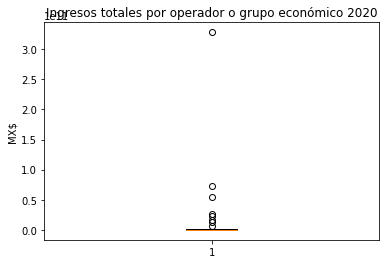

In [33]:
# Prueba de outliers (los grandes operadores)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador o grupo económico 2020')
ax1.set_ylabel('MX$')
ax1.boxplot(ingresos_por_grupo['Ingresos_Nominales_Totales'])
plt.show()

In [34]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = ingresos_por_grupo['Ingresos_Nominales_Totales'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")

lower_bound = lowerq - (0.70*iqr)
upper_bound = upperq + (0.70*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")



El cuartil más bajo de los ingresos es: 6925437.3825
El cuartil más alto de los ingresos es: 740693481.3225
El rango intercuantil de los ingresos es: 733768043.9399999
El ingreso medio es: 91769711.9 
Valores por debajo -506712193.3754999 se consideran datos aberrantes.
Valores por encima 1254331112.0805 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [35]:
# Los que quedan dentro del CPO
ingresos_por_grupo[ingresos_por_grupo['Ingresos_Nominales_Totales']<=1231751633.5665002].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,Ingresos_Nominales_Totales
GRUPO,
AIRBUS,840552292.26
MARCATEL,779656005.55
MAXCOM,744762183.63
OUI,728487374.40
EUTELSAT AMERICAS,594798976.74
"QUETZSAT, S. DE R.L. DE C.V.",530661872.00
SERVITRON,332281747.48
NETWEY,292845004.00
"AXESAT MEXICO, S.A. DE C.V.",241461303.79


In [36]:
aceptados = ingresos_por_grupo[ingresos_por_grupo['Ingresos_Nominales_Totales']<=1231751633.5665002].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)
dfi.export(aceptados, 'operadores_pequeños.png')

In [37]:
# Los que quedan fuera del CPO
ingresos_por_grupo[ingresos_por_grupo['Ingresos_Nominales_Totales']>=1231751633.5665002].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

,Ingresos_Nominales_Totales
GRUPO,
AMÉRICA MÓVIL,328009014742.74
GRUPO TELEVISA,73507375373.52
AT&T,54959588327.04
TELEFÓNICA,26177008526.87
MEGACABLE-MCM,23882952907.24
TOTALPLAY,16755280386.00
AXTEL,12355980747.07
DISH-MVS,6085327657.00
STARGROUP,1741935688.53


In [38]:
excluidos = ingresos_por_grupo[ingresos_por_grupo['Ingresos_Nominales_Totales']>=1231751633.5665002].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)
dfi.export(excluidos, 'operadores_grandes.png')

In [39]:
# Ingresos comparativo

prueba = pd.read_csv("ingresos_bit1.csv", encoding="Latin1")

In [40]:
prueba[prueba['Nombre comercial de la empresa']=="HELPPY"]

,Nombre comercial de la empresa,Fecha,Ingresos totales
61,HELPPY,03/2020,720000.00
124,HELPPY,06/2020,236923.26
190,HELPPY,09/2020,29742.00
255,HELPPY,12/2020,NaN


In [41]:
prueba1 = prueba.groupby(['Nombre comercial de la empresa']).sum()
prueba1 = prueba1.reset_index()

In [42]:
prueba1[prueba1['Nombre comercial de la empresa']=="HELPPY"]


,Nombre comercial de la empresa,Ingresos totales
28,HELPPY,986665.26


In [43]:
bienvenidos_CPO = ingresos_por_grupo[ingresos_por_grupo['Ingresos_Nominales_Totales']<=1231751633.5665002].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

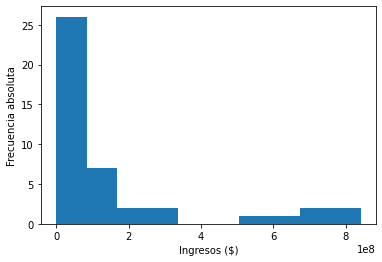

NormaltestResult(statistic=array([22.46153309]), pvalue=array([1.32598943e-05]))


In [44]:
# Distribución de los operadores que podrían ser elegibles con el criterio de quedarnos con el tercer cuartil (75%) y evitar los datos aberrantes
plt.hist(bienvenidos_CPO['Ingresos_Nominales_Totales'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(bienvenidos_CPO)) # no pasa la prueba de normalidad (sesgo)

In [45]:
# La media
mean_numpy = np.mean(bienvenidos_CPO['Ingresos_Nominales_Totales'])
print(f"La media de los ingresos es de {mean_numpy}")

La media de los ingresos es de 150834926.70441866


In [46]:
max(bienvenidos_CPO['Ingresos_Nominales_Totales'])

840552292.26

In [47]:
mode_scipy = sts.mode(bienvenidos_CPO['Ingresos_Nominales_Totales'])
print(f"The mode population is {mode_scipy}")

The mode population is ModeResult(mode=array([0.]), count=array([1]))


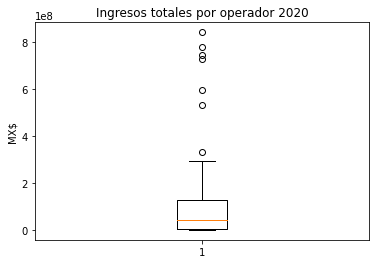

In [54]:
# Sigue habiendo un conjunto de operadores que se podrían considerar aberrantes al promedio de la distribución

# Prueba de outliers (Primer subconjunto CPO)

fig1, ax1 = plt.subplots()
ax1.set_title('Ingresos totales por operador 2020')
ax1.set_ylabel('MX$')
ax1.boxplot(bienvenidos_CPO['Ingresos_Nominales_Totales'])
plt.savefig('example.png')
plt.show()

In [49]:
# Análisis con quartiles y rango intercuantil para efectos de identificar los outliers

quartiles = bienvenidos_CPO['Ingresos_Nominales_Totales'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"El cuartil más bajo de los ingresos es: {lowerq}")
print(f"El cuartil más alto de los ingresos es: {upperq}")
print(f"El rango intercuantil de los ingresos es: {iqr}")
print(f"El ingreso medio es: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Valores por debajo {lower_bound} se consideran datos aberrantes.")
print(f"Valores por encima {upper_bound} se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.")


El cuartil más bajo de los ingresos es: 4618367.045
El cuartil más alto de los ingresos es: 129033933.49499999
El rango intercuantil de los ingresos es: 124415566.44999999
El ingreso medio es: 41817464.96 
Valores por debajo -182004982.63 se consideran datos aberrantes.
Valores por encima 315657283.16999996 se consideran datos aberrantes que no son elegibles para el Comité de Pequeños Operadores.


In [50]:
CPO_definitivos = bienvenidos_CPO[bienvenidos_CPO['Ingresos_Nominales_Totales']<=296237834.23749995].sort_values(by=['Ingresos_Nominales_Totales'], ascending=False)

In [51]:
CPO_definitivos

,Ingresos_Nominales_Totales
GRUPO,
NETWEY,292845004.00
"AXESAT MEXICO, S.A. DE C.V.",241461303.79
VIRGIN MOBILE,188566007.94
TV REY,144460927.21
IENTC,113606939.78
HISPASAT,107604255.92
FREEDOM,99534747.00
FLASH MOBILE,97278291.19
BBG COMUNICACION,92735816.56


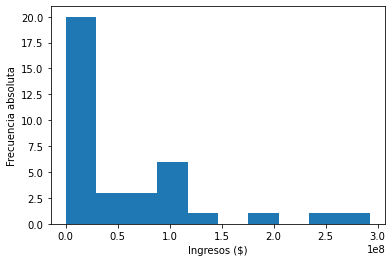

NormaltestResult(statistic=array([22.46153309]), pvalue=array([1.32598943e-05]))


In [52]:
plt.hist(CPO_definitivos['Ingresos_Nominales_Totales'])
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia absoluta')
plt.show()
print(sts.normaltest(bienvenidos_CPO)) # no pasa la prueba de normalidad (sesgo)